# **Decision Tree Classifier**

### Step 1: Import the necessary libraries

In [1]:
#for data manipulation
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for data modelling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#for finding out the accuracy of the model
from sklearn import metrics

### Step 2: Load the dataset

In [2]:
df=pd.read_csv('penguins.csv')

### Step 3: Introductory Insights

Obtain introductory information such as shape of the data, number of rows, number of columns, etc.

In [3]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [4]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [5]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [6]:
df.shape

(344, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Step 4: Statistical Insights


In [8]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Step 5: Data Cleaning

Handling outliers, duplicates and missing values

**Missing Values**

In [9]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**Duplicate Values**

In [12]:
df.duplicated().sum()

0

### Step 6:Feature Selection

In [13]:
df=df.drop(['island','sex'],axis=1)

In [14]:
# def gender(row):
#     if row['sex'] == "male":
#         return 1 
#     else:
#         return 0
# df['sex'] = df.apply(gender,axis=1)
# df

In [15]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [16]:
# def speci(row):
#     if row['species'] == "Adelie":
#         return 1 
#     elif row['species'] == "Gentoo":
#         return 2
#     else:
#         return 3
# df['species'] = df.apply(speci,axis=1)
# df

### Step 7: Data Visualisation

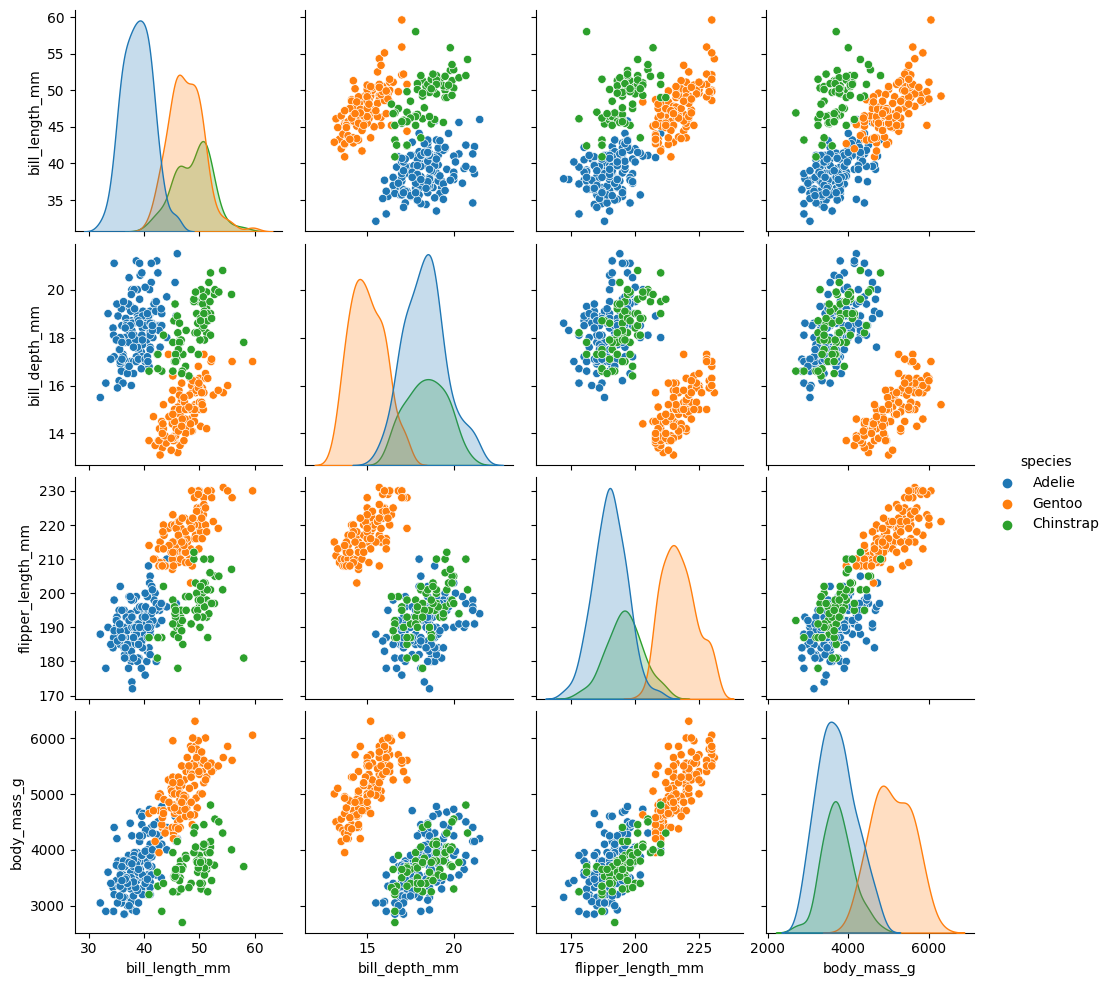

In [17]:
# Visualize the whole dataset
sns.pairplot(df, hue='species')

### Step 8: Data Modelling

* Train-Test-Split 
* Fit the model to perform predictions
* Using the **Decision Tree Classifier** Algorithm
  - wo
  - re

In [18]:
x=df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].values
x[0:5]

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       [  36.7,   19.3,  193. , 3450. ],
       [  39.3,   20.6,  190. , 3650. ]])

In [19]:
y=df['species'].values
y[0:5]

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [21]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((233, 4), (233,), (100, 4), (100,))

In [22]:
clf=DecisionTreeClassifier()

In [23]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred=clf.predict(x_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [26]:
df.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
6,Adelie,38.9,17.8,181.0,3625.0
7,Adelie,39.2,19.6,195.0,4675.0
12,Adelie,41.1,17.6,182.0,3200.0
13,Adelie,38.6,21.2,191.0,3800.0
14,Adelie,34.6,21.1,198.0,4400.0


In [27]:
df.tail(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
334,Chinstrap,50.2,18.8,202.0,3800.0
335,Chinstrap,45.6,19.4,194.0,3525.0
336,Chinstrap,51.9,19.5,206.0,3950.0
337,Chinstrap,46.8,16.5,189.0,3650.0
338,Chinstrap,45.7,17.0,195.0,3650.0
339,Chinstrap,55.8,19.8,207.0,4000.0
340,Chinstrap,43.5,18.1,202.0,3400.0
341,Chinstrap,49.6,18.2,193.0,3775.0
342,Chinstrap,50.8,19.0,210.0,4100.0
343,Chinstrap,50.2,18.7,198.0,3775.0


In [28]:
inp = []

inp_len = int(input('Enter the number of sets you want to predict the class of : '))

for val in range(inp_len):
    print('\nSet ', val+1, ': ')
    ele = [float(input('bill_length_mm : ')), float(input('bill_depth_mm : ')), float(input('flipper_length_mm : ')),float(input('body_mass_g : '))]
    inp.append(ele)
    

X_new = np.array(inp)

#Prediction of the species from the input vector
Y_pred = clf.predict(X_new)

print('\nPredicted Class: ')
for ans in range(inp_len):
  print('Set ', ans+1, ': ', Y_pred[ans])



Set  1 : 

Predicted Class: 
Set  1 :  Adelie
